<a href="https://colab.research.google.com/github/sarilacivert/4/blob/master/la.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

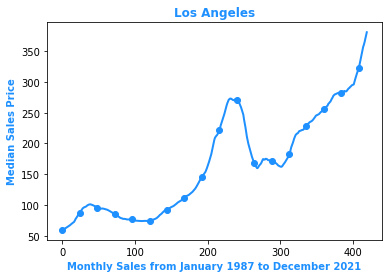

In [ ]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/sample_data/la.csv', usecols=[1], engine='python')
plt.plot(dataframe, linewidth=2, markevery=24, marker='o', color='dodgerblue')
plt.ylabel('Median Sales Price', fontweight='bold', color='dodgerblue')
plt.xlabel('Monthly Sales from January 1987 to December 2021',fontweight='bold', color='dodgerblue')
plt.title('Los Angeles', fontweight='bold', color='dodgerblue')
plt.show()

# TEST

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
dataframe = pandas.read_csv('/content/sample_data/la.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LXXRSA  420 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


(array([107.,  74.,  17.,  63.,  29.,  44.,  54.,  19.,   6.,   7.]),
 array([ 59.42622437,  91.57365238, 123.7210804 , 155.86850841,
        188.01593642, 220.16336444, 252.31079245, 284.45822046,
        316.60564847, 348.75307649, 380.9005045 ]),
 <a list of 10 Patch objects>)

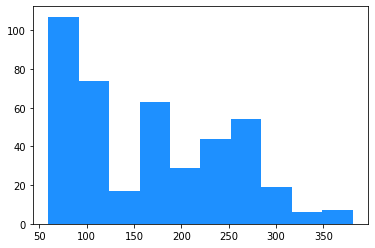

In [6]:
plt.hist(dataframe['LXXRSA'], color = 'dodgerblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


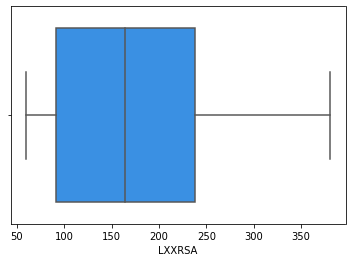

In [7]:
import seaborn as sns
sns.boxplot(dataframe['LXXRSA'], color='dodgerblue')

In [8]:
from statsmodels.tsa.stattools import adfuller

# test run for stationarity
result = adfuller(dataframe['LXXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))



ADF Statistic: 0.556209
p-value: 0.986485
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Non - Stationary dataset because p - value is greater than 0.05

In [9]:
from scipy.stats import jarque_bera

# normality test
stat, p = jarque_bera(dataframe['LXXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=31.763, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
dataframe['LXXRSA'].skew(), dataframe['LXXRSA'].kurt()

(0.45251330427603176, -0.9985013465659076)

In [11]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

281 139


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
279/279 - 2s - loss: 0.0407 - 2s/epoch - 7ms/step
Epoch 2/100
279/279 - 0s - loss: 0.0237 - 336ms/epoch - 1ms/step
Epoch 3/100
279/279 - 0s - loss: 0.0164 - 320ms/epoch - 1ms/step
Epoch 4/100
279/279 - 0s - loss: 0.0097 - 321ms/epoch - 1ms/step
Epoch 5/100
279/279 - 0s - loss: 0.0045 - 316ms/epoch - 1ms/step
Epoch 6/100
279/279 - 0s - loss: 0.0015 - 297ms/epoch - 1ms/step
Epoch 7/100
279/279 - 0s - loss: 3.6811e-04 - 296ms/epoch - 1ms/step
Epoch 8/100
279/279 - 0s - loss: 9.5353e-05 - 307ms/epoch - 1ms/step
Epoch 9/100
279/279 - 0s - loss: 5.8026e-05 - 320ms/epoch - 1ms/step
Epoch 10/100
279/279 - 0s - loss: 5.6593e-05 - 325ms/epoch - 1ms/step
Epoch 11/100
279/279 - 0s - loss: 5.5887e-05 - 332ms/epoch - 1ms/step
Epoch 12/100
279/279 - 0s - loss: 5.3842e-05 - 314ms/epoch - 1ms/step
Epoch 13/100
279/279 - 0s - loss: 5.4419e-05 - 307ms/epoch - 1ms/step
Epoch 14/100
279/279 - 0s - loss: 5.6282e-05 - 312ms/epoch - 1ms/step
Epoch 15/100
279/279 - 0s - loss: 5.7125e-05 - 310ms/epo

In [17]:
# from public GitHub

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.36 RMSE
Test Score: 8.47 RMSE


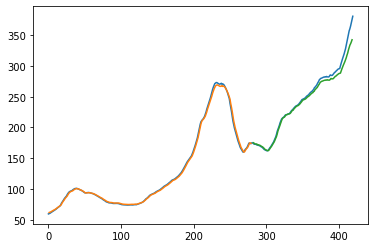

In [21]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
accuracy_score(??y??, testPredict)

SyntaxError: ignored

In [30]:
testPredict

array([[175.24011],
       [174.66376],
       [173.37598],
       [173.1949 ],
       [172.99747],
       [173.08989],
       [171.81386],
       [171.88971],
       [171.31712],
       [171.06857],
       [170.48293],
       [169.53694],
       [168.87991],
       [168.26994],
       [167.20798],
       [165.98729],
       [164.51183],
       [163.82428],
       [162.99911],
       [162.63802],
       [162.29056],
       [162.51169],
       [163.89203],
       [165.79555],
       [167.54782],
       [168.98499],
       [171.01173],
       [173.11584],
       [175.23274],
       [177.01593],
       [180.09998],
       [182.74756],
       [185.47719],
       [189.61346],
       [194.51698],
       [197.60944],
       [200.99004],
       [204.47725],
       [208.52151],
       [211.31586],
       [214.17775],
       [215.53029],
       [216.59447],
       [216.94972],
       [218.67294],
       [220.45464],
       [220.80818],
       [221.13367],
       [221.72243],
       [222.30257],
